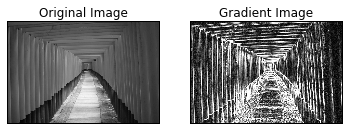

In [110]:
import numpy as np
import cv2

# 圖片灰階梯度化

# load the image and convert it to grayscale
#image = cv2.imread('7elevenLogo.jpg')
image = cv2.imread('fushimi2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# compute the Scharr gradient magnitude representation of the images
# in both the x and y direction
gradX = cv2.Sobel(gray, ddepth = cv2.cv.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.cv.CV_32F, dx = 0, dy = 1, ksize = -1)

# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)



plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gradient,cmap = 'gray')
plt.title('Gradient Image'), plt.xticks([]), plt.yticks([])
plt.show()

cv2.imshow('gradient',gradient)
cv2.waitKey(0)
cv2.destroyAllWindows()  

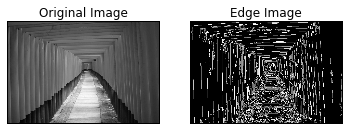

In [149]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# canny方法取邊緣

# load the image and convert it to eadge map
img = cv2.imread('fushimi2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,5,100)

plt.subplot(121),plt.imshow(gray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

cv2.imshow('edges',edges)
cv2.waitKey(0)
cv2.destroyAllWindows()  

In [59]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Hough Line Transform
img = cv2.imread('simitsu6.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150)
minLineLength = 10
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,40,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

# cv2.imwrite('houghlines5.jpg',img)

plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

400.0
3750


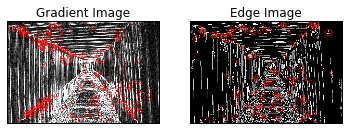

In [112]:
from matplotlib import pyplot as plt

# SURF找特徵

surf = cv2.SURF(400)
#Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(gradient,None)
len(kp)

# Check present Hessian threshold
print surf.hessianThreshold

# We set it to some 50000. Remember, it is just for representing in picture.
# In actual cases, it is better to have a value 300-500
surf.hessianThreshold = 10000  #越小越細節

# Again compute keypoints and check its number.
kp1, des1 = surf.detectAndCompute(gradient,None)
kp2, des2 = surf.detectAndCompute(edges,None)
print len(kp)

gradient_kp = cv2.drawKeypoints(gradient,kp1,None,(255,0,0),4)
edges_kp = cv2.drawKeypoints(edges,kp2,None,(255,0,0),4)

plt.subplot(121),plt.imshow(gradient_kp,cmap = 'gray')
plt.title('Gradient Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges_kp,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [10]:
# 將上面兩段程式定義成方法
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

def gradient_im(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gradX = cv2.Sobel(gray, ddepth = cv2.cv.CV_32F, dx = 1, dy = 0, ksize = -1)
    gradY = cv2.Sobel(gray, ddepth = cv2.cv.CV_32F, dx = 0, dy = 1, ksize = -1)
    gradient = cv2.subtract(gradX, gradY)
    gradient = cv2.convertScaleAbs(gradient)
    return gradient

def surf_features(img_object):
    surf = cv2.SURF(400)
    surf.hessianThreshold = 10000
    kp, des = surf.detectAndCompute(img_object,None)
    keypoints_img = cv2.drawKeypoints(img_object,kp,None,(255,0,0),4)
    return kp, des

In [11]:
def drawMatches(img1, kp1, img2, kp2, matches):
    """
    My own implementation of cv2.drawMatches as OpenCV 2.4.9
    does not have this function available but it's supported in
    OpenCV 3.0.0

    This function takes in two images with their associated 
    keypoints, as well as a list of DMatch data structure (matches) 
    that contains which keypoints matched in which images.

    An image will be produced where a montage is shown with
    the first image followed by the second image beside it.

    Keypoints are delineated with circles, while lines are connected
    between matching keypoints.

    img1,img2 - Grayscale images
    kp1,kp2 - Detected list of keypoints through any of the OpenCV keypoint 
              detection algorithms
    matches - A list of matches of corresponding keypoints through any
              OpenCV keypoint matching algorithm
    """

    # Create a new output image that concatenates the two images together
    # (a.k.a) a montage
    rows1 = img1.shape[0]
    cols1 = img1.shape[1]
    rows2 = img2.shape[0]
    cols2 = img2.shape[1]

    out = np.zeros((max([rows1,rows2]),cols1+cols2,3), dtype='uint8')

    # Place the first image to the left
    out[:rows1,:cols1] = np.dstack([img1, img1, img1])

    # Place the next image to the right of it
    out[:rows2,cols1:] = np.dstack([img2, img2, img2])

    # For each pair of points we have between both images
    # draw circles, then connect a line between them
    for mat in matches:

        # Get the matching keypoints for each of the images
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx

        # x - columns
        # y - rows
        (x1,y1) = kp1[img1_idx].pt
        (x2,y2) = kp2[img2_idx].pt

        # Draw a small circle at both co-ordinates
        # radius 4
        # colour blue
        # thickness = 1
        cv2.circle(out, (int(x1),int(y1)), 4, (255, 0, 0), 1)   
        cv2.circle(out, (int(x2)+cols1,int(y2)), 4, (255, 0, 0), 1)

        # Draw a line in between the two points
        # thickness = 1
        # colour blue
        cv2.line(out, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), (255, 0, 0), 1)


    # Show the image
    #cv2.imshow('Matched Features', out)
    #cv2.waitKey(0)
    #cv2.destroyWindow('Matched Features')

    # Also return the image if you'd like a copy
    return out

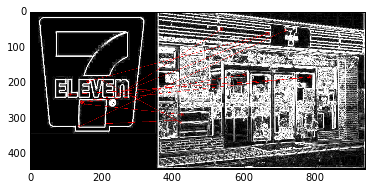

In [14]:
# main執行段
# SURF matching

path1 = '7elevenLogo.jpg'
path2 = '7elevenTest.jpg'

img1 = cv2.imread(path1)
img2 = cv2.imread(path2)

gradient_img1 = gradient_im(img1)
gradient_img2 = gradient_im(img2)

kp1, des1 = surf_features(gradient_img1)
kp2, des2 = surf_features(gradient_img2)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = drawMatches(gradient_img1,kp1,gradient_img2,kp2,matches[:10])

plt.imshow(img3)
plt.show()


cv2.imshow('img3',img3)
cv2.waitKey(0)
cv2.destroyAllWindows()  


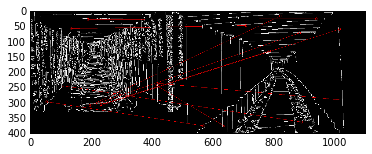

In [81]:
# canny method test
# main執行段
# SURF matching

path1 = 'fushimi4.jpg'
path2 = 'fushimi2.jpg'

img1 = cv2.imread(path1)
img2 = cv2.imread(path2)

edge_img1 = cv2.Canny(img1,100,300)
edge_img2 = cv2.Canny(img2,100,300)

kp1, des1 = surf_features(edge_img1)
kp2, des2 = surf_features(edge_img2)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = drawMatches(edge_img1,kp1,edge_img2,kp2,matches[:10])

plt.imshow(img3)
plt.show()
cv2.imshow('img3',img3)
cv2.waitKey(0)
cv2.destroyAllWindows()  

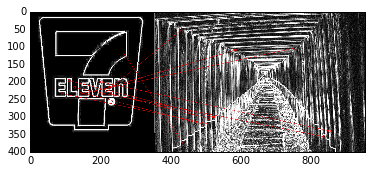

In [79]:
path1 = '7elevenLogo.jpg'
path2 = 'fushimi2.jpg'

img1 = cv2.imread(path1)
img2 = cv2.imread(path2)

gradient_img1 = gradient_im(img1)
gradient_img2 = gradient_im(img2)

kp1, des1 = surf_features(gradient_img1)
kp2, des2 = surf_features(gradient_img2)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = drawMatches(gradient_img1,kp1,gradient_img2,kp2,matches[:10])

plt.imshow(img3)
plt.show()
cv2.imshow('img3',img3)
cv2.waitKey(0)
cv2.destroyAllWindows()  

# match test
## step 1. gray
## step 2. blur
## step 3. sift(surf)

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 混合測試

# load the image and convert it to grayscale
#image = cv2.imread('7elevenLogo.jpg')
image = cv2.imread('simitsu1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

##濾波 (參見openCV_smooth)
# gray = cv2.bilateralFilter(gray,9, 41, 41)  #雙邊
gray = cv2.GaussianBlur(gray,(3,3),0.5)       #高斯
# canny方法取邊緣
# load the image and convert it to eadge map
edges = cv2.Canny(gray,50,100)

cv2.imshow('edges',edges)
cv2.waitKey(0)
cv2.destroyAllWindows()  

In [9]:
#將以上處裡寫成方法
import cv2
import numpy as np
from matplotlib import pyplot as plt
def BlurCanny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray,(3,3),0.5)
    edges = cv2.Canny(gray,50,150,apertureSize =3)
    return edges

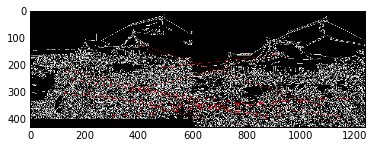

In [12]:
path1 = 'img/simitsu1.jpg'
path2 = 'img/simitsu4.jpg'

img1 = cv2.imread(path1)
img2 = cv2.imread(path2)

bc_img1 = BlurCanny(img1)
bc_img2 = BlurCanny(img2)

kp1, des1 = surf_features(bc_img1)
kp2, des2 = surf_features(bc_img2)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = drawMatches(bc_img1,kp1,bc_img2,kp2,matches[:10])

plt.imshow(img3)
plt.show()
cv2.imshow('img3',img3)
cv2.waitKey(0)
cv2.destroyAllWindows()  

# similarity rank count
### Key word: Hough Line Transform, Line feature

In [1]:
import cv2
import numpy as np
import math

# Hough Line Transform
# Find the peak percentage and distance ratio
def PeakPercentage(img):
    lines = cv2.HoughLines(img,1,np.pi/180,1)          #  1 <= t <= 180
    
    # The peak percentage
    HoughPeak = {}
    percentage = {}
    for ZT in lines[0]:
        if ZT[1] in HoughPeak:
            HoughPeak[ZT[1]] += 1    #the number of Hough peaks in the theta bin
        else:
            HoughPeak[ZT[1]] = 1
    for key in HoughPeak:
        # len(lines[0]) :the total number of Hough peaks in the Hough parameter space
        percentage[key] = HoughPeak[key] *1.0 / len(lines[0]) 
     
    
    # distance ratio feature
    distanceRatioDic = {}
    for key in sorted(HoughPeak):
        ZoDic = {}
        ZoList = []
        w = 1
        for ele in lines[0]:
            if ele[1] == key:
                ZoList.append(ele[0])
        for zo in sorted(ZoList):
            ZoDic[w] = zo
            w += 1
        tempZo2 = 0
        tempWeightZo = 0
        sumWeight = 0
        for weight in ZoDic:
            tempZo2 += ZoDic[weight] * ZoDic[weight]
            tempWeightZo += weight * ZoDic[weight]
            sumWeight += weight
        distanceRatioDic[key] = math.sqrt(tempZo2)/(tempWeightZo/sumWeight)        
        
    
    return lines, percentage, distanceRatioDic


# Gauss Blur and Canny Edge 
def BlurCanny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray,(3,3),0.5)
    edges = cv2.Canny(gray,50,150,apertureSize =3)
    return edges

In [46]:
import cv2
import numpy as np
import math

# http://nabinsharma.wordpress.com/2012/12/26/linear-hough-transform-using-python/
def hough_transform(img_bin, theta_res=1, rho_res=1):
    nR,nC = img_bin.shape
    theta = np.linspace(-89.0, 0.0, np.ceil(90.0/theta_res) + 1.0)
    theta = np.concatenate((theta, -theta[len(theta)-2::-1]))

    D = np.sqrt((nR - 1)**2 + (nC - 1)**2)
    q = np.ceil(D/rho_res)
    nrho = 2*q + 1
    rho = np.linspace(-q*rho_res, q*rho_res, nrho)
    H = np.zeros((len(rho), len(theta)))
    for rowIdx in range(nR):
        for colIdx in range(nC):
            if img_bin[rowIdx, colIdx]:
                for thIdx in range(len(theta)):
                    rhoVal = colIdx*np.cos(theta[thIdx]*np.pi/180.0) + \
                    rowIdx*np.sin(theta[thIdx]*np.pi/180)
                rhoIdx = np.nonzero(np.abs(rho-rhoVal) == np.min(np.abs(rho-rhoVal)))[0]
                H[rhoIdx[0], thIdx] += 1
    return rho, theta, H

# The peak percentage & distance ratio feature
def prValue(img):
    rho, theta, H = hough_transform(img)
    tempcol = []
    totalPeak = 0
    for row in range(len(H)):
        if sum(H[row]) !=0:
            for column in range(H[row]):
                if column != 0:
                    tempcol.append([rho[row], theta[column], H[row][column]])
                    totalPeak += 1
    # The peak percentage
    HoughPeak = {}
    percentage = {}
    for tripale in tempcol:
        if tripale[1] in HoughPeak:
            HoughPeak[tripale[1]] += 1
        else:
            HoughPeak[tripale[1]] = 1
    for key in HoughPeak:
        percentage[key] = HoughPeak[key] / totalPeak
    
    # distance ratio feature
    

In [2]:
# rank function
def s(k,q,m,J):
    Numerator = 0
    d1 = 0
    d2 = 0
    Denominator = 0
    # Numerator
    if m == 1:
        for j in range(0,J-m+1): Numerator += q[j]*k[j+m]
        Numerator += q[J]*k[0]
    elif m ==  J-1:
        for j in range(J-m+1,J+1): Numerator += q[j]*k[j+m-J]
        Numerator += q[0]*k[J]
    else:
        for j in range(0,J-m+1): Numerator += q[j]*k[j+m]
        for j in range(J-m+1,J+1): Numerator += q[j]*k[j+m-J]
    for j in range(0,J):
        d1 += q[j]*q[j]
        d2 += k[j]*k[j]
    Denominator = math.sqrt(d1)*math.sqrt(d2)
    return Numerator / Denominator


def rankingFunction(percentage_q, distanceRatio_q,  database):
# sort query img
    pq = []
    rq = []
    for key in sorted(percentage_q):
        pq.append(percentage_q[key])
        rq.append(distanceRatio_q[key])
    # sort 
    ranking = {}
    for path in database:
        # sort kth database img
        pk = []
        rk = []
        for key in sorted(percentage_q):
            pk.append(database[path]['percentage'][key])
            rk.append(database[path]['DistanceRatio'][key])     
        # solve spk rpk
        plist = []
        rlist = []
        J = 180 - 1  #degree
        for m in range(1,J-1):
            plist.append(s(pk,pq,m,J))
            rlist.append(s(rk,rq,m,J))
        p = max(plist)
        r = max(rlist)
        rank = p + r
        ranking[path] = rank
    return ranking

In [7]:
import cv2
import numpy as np

# query INFO.
path_q = 'img/simitsu1.jpg' #query image
img_q = cv2.imread(path_q)
edges_q = BlurCanny(img_q)
lines_q, percentage_q, distanceRatio_q = PeakPercentage(edges_q)
# 正規化(0~1)
redistanceRatio_q = {}
for ele in distanceRatio_q:
    redistanceRatio_q[ele] = (distanceRatio_q[ele] - min(distanceRatio_q.values()))/ ( max(distanceRatio_q.values()) - min(distanceRatio_q.values()))

# database INFO. should be from database
# already handle
database = ['simitsu1.jpg', 'simitsu4.jpg', 'simitsu5.jpg', 'simitsu6.jpg','TokyoTower001.jpg','TokyoTower002.jpg','TokyoTower003.jpg','TokyoTower004.jpg']
database_t = {}
for path in database:
    tempDic = {}
    img_k = cv2.imread('img/'+path)
    edges_k = BlurCanny(img_k)
    lines_k, percentage_k, distanceRatio_k = PeakPercentage(edges_k)
    tempDic['percentage'] = percentage_k
    # 正規化(0~1)
    redistanceRatio_k = {}
    for ele in distanceRatio_q:
        redistanceRatio_k[ele] = (distanceRatio_k[ele] - min(distanceRatio_k.values()))/ ( max(distanceRatio_k.values()) - min(distanceRatio_k.values()))
    tempDic['DistanceRatio'] = redistanceRatio_k
    database_t[path] = tempDic.copy()

rankDic = rankingFunction(percentage_q, redistanceRatio_q, database_t)

In [8]:
print rankDic

{'simitsu5.jpg': 1.9854974481952659, 'simitsu1.jpg': 1.9880793656883569, 'TokyoTower001.jpg': 1.9853012252574778, 'simitsu4.jpg': 1.989448654623273, 'TokyoTower003.jpg': 1.988298831059744, 'simitsu6.jpg': 1.9896784067941735, 'TokyoTower002.jpg': 1.9720424568907315, 'TokyoTower004.jpg': 1.986806860017047}


In [68]:
# query INFO.
path_q = 'simitsu1.jpg' #query image
img_q = cv2.imread(path_q)
edges_q = BlurCanny(img_q)
lines_q, percentage_q, distanceRatio_q = PeakPercentage(edges_q)

pq = []
rq = []
for key in sorted(percentage_q):
    pq.append(percentage_q[key])
    rq.append(distanceRatio_q[key])
J = 180 - 1  #degree
plist = []
rlist = []
for m in range(1,J-1):
    plist.append(s(pq,pq,m,J))
    rlist.append(s(rq,rq,m,J))
p = max(plist)
r = max(rlist)
print rlist
rank = p + r
print rank

[1.0043008954013901, 1.0035157660605194, 1.0029269785714503, 1.003823729108, 1.0034838847669405, 1.0026121155859746, 1.0027030665859349, 1.0023990802503941, 1.0027021694828746, 1.0023259825969155, 1.0023682487566654, 1.0014707602389665, 1.0034220250538028, 1.0013090752642964, 1.0016004520522008, 1.0002778460778106, 1.0001179772982582, 0.9995529545451802, 0.9996626570053881, 0.9997113412406711, 0.9989020495804228, 0.9980137389717877, 0.9976838247183996, 0.9975467539165872, 0.9975856948621352, 0.9964909269930868, 0.9954096368406792, 0.995583609302959, 0.9943599638146615, 0.994533915590951, 0.9945167024697902, 0.9947625435513848, 0.9922455099069207, 0.9925568063192851, 0.99156467371437, 0.9918047972093736, 0.9906434867738424, 0.9896741352959958, 0.9892373687843701, 0.9892072828114734, 0.9890407804129613, 0.9871848637055329, 0.9875468231927195, 0.9871294618853924, 0.9910882002919446, 0.98442512500661, 0.9854413759635436, 0.9844698596510255, 0.9842740729485553, 0.9841410093785863, 0.9823662

In [70]:
# query INFO.
t = 10
path_q = 'simitsu1.jpg' #query image
img_q = cv2.imread(path_q)
edges_q = BlurCanny(img_q)

lines = cv2.HoughLines(edges_q,1,np.pi/180,1)
linesP = cv2.HoughLinesP(edges_q,1,np.pi/180,1)

# for i in range(0,len(lines_q[0])):
#     if lines_q[0][i][1] == lines_q[0][t][1] and lines_q[0][i][0] == lines_q[0][t][0]:
#         print lines_q[0][i]

In [83]:
import math
ang = []
angP = []
for pair in lines[0]:
    if pair[1] not in ang:
        ang.append(pair[1])

for l in linesP[0]:
    x0,y0,x1,y1 = l
    if x0 == 0:
        if np.arctan(np.inf) not in angP:
            angP.append(np.arctan(np.inf))
    elif np.arctan(y0/x0) not in angP:
        angP.append(np.arctan(y0/x0))
ang = sorted(ang)
angP = sorted(angP)
for ele in angP:
    print int(ele/(np.pi/180))


0
45
63
71
75
78
80
81
82
83
84
84
85
85
85
86
86
86
86
86
87
87
87
87
87
87
87
87
87
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
89
90


In [47]:
rho_q, theta_q, H_q = hough_transform(edges_q)

In [48]:
print theta_q

[-89.         -88.01111111 -87.02222222 -86.03333333 -85.04444444
 -84.05555556 -83.06666667 -82.07777778 -81.08888889 -80.1        -79.11111111
 -78.12222222 -77.13333333 -76.14444444 -75.15555556 -74.16666667
 -73.17777778 -72.18888889 -71.2        -70.21111111 -69.22222222
 -68.23333333 -67.24444444 -66.25555556 -65.26666667 -64.27777778
 -63.28888889 -62.3        -61.31111111 -60.32222222 -59.33333333
 -58.34444444 -57.35555556 -56.36666667 -55.37777778 -54.38888889 -53.4
 -52.41111111 -51.42222222 -50.43333333 -49.44444444 -48.45555556
 -47.46666667 -46.47777778 -45.48888889 -44.5        -43.51111111
 -42.52222222 -41.53333333 -40.54444444 -39.55555556 -38.56666667
 -37.57777778 -36.58888889 -35.6        -34.61111111 -33.62222222
 -32.63333333 -31.64444444 -30.65555556 -29.66666667 -28.67777778
 -27.68888889 -26.7        -25.71111111 -24.72222222 -23.73333333
 -22.74444444 -21.75555556 -20.76666667 -19.77777778 -18.78888889 -17.8
 -16.81111111 -15.82222222 -14.83333333 -13.8444444